In [66]:
import pandas as pd
import numpy as np

- 訓練テーブルには、2017年2月1日～2020年3月31日までの、花粉飛散量・天候情報が含まれます。
- テストテーブルには、2020年4月1日～4月14日までの、天候情報のみが含まれます。

In [67]:
class Config:
    train_path = "../input/train_v2.csv"
    test_path = "../input/test_v2.csv"
    sample_submission_path = "../input/sample_submission.csv"

In [68]:
df_train = pd.read_csv(Config.train_path)
df_train.head()

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,pollen_utsunomiya,pollen_chiba,pollen_tokyo
0,2017020101,0.0,0.0,0.0,-1.0,4.1,2.9,16,1,2,2.7,2.5,1.3,0.0,8.0,0.0
1,2017020102,0.0,0.0,0.0,-1.1,4.2,2.6,1,1,1,3.3,1.5,0.9,0.0,24.0,4.0
2,2017020103,0.0,0.0,0.0,-0.7,4.2,2.4,1,15,16,4.0,1.7,0.6,4.0,32.0,12.0
3,2017020104,0.0,0.0,0.0,-1.1,4.4,1.8,1,15,1,4.1,3.1,1.4,0.0,12.0,0.0
4,2017020105,0.0,0.0,0.0,-1.2,4.1,1.5,2,14,14,3.7,3.4,0.9,0.0,32.0,4.0


In [69]:
df_train.loc[df_train["pollen_chiba"] <0 , "pollen_chiba"] = 0
df_train.loc[df_train["pollen_tokyo"] <0 , "pollen_tokyo"] = 0
df_train.loc[df_train["pollen_utsunomiya"] <0 , "pollen_utsunomiya"] = 0

In [70]:
import datetime
import re
# 時間
def to_datetime(time: datetime.datetime) -> datetime.datetime:
    time = str(time)
    try:
        time = datetime.datetime.strptime(time, "%Y%m%d%H")
    except ValueError:
        time = re.sub("24$", "23", time)
        time = datetime.datetime.strptime(time, "%Y%m%d%H")
        time += datetime.timedelta(hours=1)
    return time


def time_feat(df: pd.DataFrame) -> pd.DataFrame:
    df["datetime_dt"] = df["datetime"].apply(to_datetime)
    df["year"] = df["datetime_dt"].dt.year
    df["month"] = df["datetime_dt"].dt.month
    return df

In [71]:
#df_train = time_feat(df_train)

In [72]:
df_train.tail()

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,pollen_utsunomiya,pollen_chiba,pollen_tokyo
12235,2020033120,0.0,0.0,0,10.0,11.5,9.4,16,2,16,2.4,2.6,0.7,8.0,8.0,4.0
12236,2020033121,0.0,0.0,0,10.1,11.3,8.9,15,15,14,2.4,1.7,1.3,8.0,4.0,4.0
12237,2020033122,0.0,0.0,0,9.8,11.3,8.8,3,15,15,1.2,2.7,0.9,0.0,4.0,0.0
12238,2020033123,0.5,0.0,0,9.7,10.9,8.9,16,16,1,0.5,2.9,0.6,0.0,0.0,0.0
12239,2020033124,0.0,0.0,0,9.7,10.7,8.9,16,1,16,1.0,2.7,0.4,0.0,8.0,0.0


In [73]:
df_train.describe()

,datetime,precipitation_utsunomiya,precipitation_chiba,temperature_utsunomiya,winddirection_utsunomiya,windspeed_utsunomiya,pollen_utsunomiya,pollen_chiba,pollen_tokyo
count,1.224000e+04,12240.000000,12240.000000,12240.000000,12240.000000,12240.000000,12240.000000,12240.000000,12240.000000
mean,2.018275e+09,0.135825,0.140727,12.684828,7.443382,3.130188,86.119853,29.467974,26.543627
std,9.987355e+05,0.812213,0.765789,7.804066,5.056384,1.919938,341.709872,100.122834,74.482456
min,2.017020e+09,0.000000,0.000000,-6.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.017061e+09,0.000000,0.000000,6.400000,3.000000,1.800000,0.000000,0.000000,0.000000
50%,2.018052e+09,0.000000,0.000000,12.800000,7.000000,2.700000,16.000000,8.000000,4.000000
75%,2.019042e+09,0.000000,0.000000,18.700000,11.000000,4.100000,57.000000,24.000000,21.000000
max,2.020033e+09,27.500000,21.500000,33.700000,16.000000,15.900000,12193.000000,4141.000000,2209.000000


In [74]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12240 entries, 0 to 12239
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   datetime                  12240 non-null  int64  
 1   precipitation_utsunomiya  12240 non-null  float64
 2   precipitation_chiba       12240 non-null  float64
 3   precipitation_tokyo       12240 non-null  object 
 4   temperature_utsunomiya    12240 non-null  float64
 5   temperature_chiba         12240 non-null  object 
 6   temperature_tokyo         12240 non-null  object 
 7   winddirection_utsunomiya  12240 non-null  int64  
 8   winddirection_chiba       12240 non-null  object 
 9   winddirection_tokyo       12240 non-null  object 
 10  windspeed_utsunomiya      12240 non-null  float64
 11  windspeed_chiba           12240 non-null  object 
 12  windspeed_tokyo           12240 non-null  object 
 13  pollen_utsunomiya         12240 non-null  float64
 14  pollen

In [75]:
df_test = pd.read_csv(Config.test_path)
df_test.head()

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,pollen_utsunomiya,pollen_chiba,pollen_tokyo
0,2020040101,0.0,0.0,0.0,9.5,10.5,9.0,14,2,14,2.1,2.3,1.2,0,0,0
1,2020040102,0.0,0.0,0.0,9.2,10.3,9.0,2,16,14,1.4,2.7,0.8,0,0,0
2,2020040103,0.0,0.0,0.0,9.2,10.2,9.1,16,16,12,3.3,2.5,0.5,0,0,0
3,2020040104,0.0,0.0,0.0,9.4,10.3,9.2,2,15,14,1.3,2.9,1.2,0,0,0
4,2020040105,0.0,0.0,0.0,9.3,10.2,9.3,2,16,15,2.3,2.6,0.7,0,0,0


In [76]:
df_test.tail()

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,pollen_utsunomiya,pollen_chiba,pollen_tokyo
331,2020041420,0.0,0.0,0.0,9.9,12.5,10.2,1,16,1,2.8,1.9,1.9,0,0,0
332,2020041421,0.0,0.0,0.0,8.3,11.7,10.1,14,15,1,2.2,3.6,1.7,0,0,0
333,2020041422,0.0,0.0,0.0,7.2,11.5,8.8,13,16,1,2.9,0.9,1.0,0,0,0
334,2020041423,0.0,0.0,0.0,6.9,10.8,8.4,13,14,13,2.2,3.1,1.2,0,0,0
335,2020041424,0.0,0.0,0.0,5.9,10.2,7.2,13,14,13,2.5,4.1,0.5,0,0,0


In [77]:
df_test.describe() 

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,pollen_utsunomiya,pollen_chiba,pollen_tokyo
count,3.360000e+02,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.0,336.0,336.0
mean,2.020041e+09,0.166667,0.388393,0.394345,10.452679,12.583333,11.398214,8.306548,8.827381,8.952381,4.080655,4.330060,2.011012,0.0,0.0,0.0
std,4.037736e+02,0.597674,1.600900,1.475673,4.043804,3.169597,3.742000,5.690900,5.633055,5.677197,2.998290,2.446884,1.271325,0.0,0.0,0.0
min,2.020040e+09,0.000000,0.000000,0.000000,1.600000,5.400000,3.500000,1.000000,1.000000,0.000000,0.300000,0.300000,0.100000,0.0,0.0,0.0
25%,2.020040e+09,0.000000,0.000000,0.000000,7.600000,10.000000,8.300000,3.000000,2.000000,2.000000,2.175000,2.300000,1.000000,0.0,0.0,0.0
50%,2.020041e+09,0.000000,0.000000,0.000000,10.200000,12.700000,11.150000,7.000000,10.000000,9.000000,3.000000,3.700000,1.700000,0.0,0.0,0.0
75%,2.020041e+09,0.000000,0.000000,0.000000,13.200000,14.900000,14.325000,15.000000,14.000000,14.250000,5.100000,5.825000,2.700000,0.0,0.0,0.0
max,2.020041e+09,5.000000,18.000000,14.000000,20.300000,20.000000,21.000000,16.000000,16.000000,16.000000,16.800000,11.500000,7.000000,0.0,0.0,0.0


In [78]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   datetime                  336 non-null    int64  
 1   precipitation_utsunomiya  336 non-null    float64
 2   precipitation_chiba       336 non-null    float64
 3   precipitation_tokyo       336 non-null    float64
 4   temperature_utsunomiya    336 non-null    float64
 5   temperature_chiba         336 non-null    float64
 6   temperature_tokyo         336 non-null    float64
 7   winddirection_utsunomiya  336 non-null    int64  
 8   winddirection_chiba       336 non-null    int64  
 9   winddirection_tokyo       336 non-null    int64  
 10  windspeed_utsunomiya      336 non-null    float64
 11  windspeed_chiba           336 non-null    float64
 12  windspeed_tokyo           336 non-null    float64
 13  pollen_utsunomiya         336 non-null    int64  
 14  pollen_chi

In [79]:
columns_tokyo = [col for col in df_train.columns if "tokyo" in col]
columns_chiba = [col for col in df_train.columns if "chiba" in col]
columns_utsunomiya = [col for col in df_train.columns if "utsunomiya" in col]


In [80]:
df_train[["datetime"] + columns_tokyo]

,datetime,precipitation_tokyo,temperature_tokyo,winddirection_tokyo,windspeed_tokyo,pollen_tokyo
0,2017020101,0.0,2.9,2,1.3,0.0
1,2017020102,0.0,2.6,1,0.9,4.0
2,2017020103,0.0,2.4,16,0.6,12.0
3,2017020104,0.0,1.8,1,1.4,0.0
4,2017020105,0.0,1.5,14,0.9,4.0
...,...,...,...,...,...,...
12235,2020033120,0,9.4,16,0.7,4.0
12236,2020033121,0,8.9,14,1.3,4.0
12237,2020033122,0,8.8,15,0.9,0.0
12238,2020033123,0,8.9,1,0.6,0.0


In [81]:
df = pd.concat([df_train, df_test]).reset_index(drop=True).fillna(-1)

In [82]:
df = time_feat(df)

# 欠損値

In [83]:
df[df["precipitation_tokyo"] == '欠測']

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,pollen_utsunomiya,pollen_chiba,pollen_tokyo,datetime_dt,year,month
11867,2020031612,0.0,0.0,欠測,10.5,12.2,欠測,4,14,欠測,1.5,6.1,欠測,16.0,8.0,8.0,2020-03-16 12:00:00,2020,3
11868,2020031613,0.0,0.0,欠測,10.4,12.2,欠測,16,14,欠測,9.8,5.9,欠測,41.0,36.0,12.0,2020-03-16 13:00:00,2020,3


In [84]:
df[df["temperature_chiba"] == '欠測']

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,pollen_utsunomiya,pollen_chiba,pollen_tokyo,datetime_dt,year,month
11218,2020021811,0.0,0.0,0,8.9,欠測,9.8,11,欠測,3,11.3,欠測,1.8,53.0,12.0,41.0,2020-02-18 11:00:00,2020,2
11219,2020021812,0.0,0.0,0,9.8,欠測,10.5,12,欠測,12,9.8,欠測,1.5,36.0,20.0,82.0,2020-02-18 12:00:00,2020,2
11220,2020021813,0.0,0.0,0,8.5,欠測,10.9,13,欠測,16,8.8,欠測,2.3,12.0,12.0,53.0,2020-02-18 13:00:00,2020,2


In [85]:
df[df["temperature_tokyo"] == '欠測']

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,pollen_utsunomiya,pollen_chiba,pollen_tokyo,datetime_dt,year,month
11866,2020031611,0.0,0.0,0,10.6,10.7,欠測,5,12,欠測,1.8,4.5,欠測,16.0,8.0,4.0,2020-03-16 11:00:00,2020,3
11867,2020031612,0.0,0.0,欠測,10.5,12.2,欠測,4,14,欠測,1.5,6.1,欠測,16.0,8.0,8.0,2020-03-16 12:00:00,2020,3
11868,2020031613,0.0,0.0,欠測,10.4,12.2,欠測,16,14,欠測,9.8,5.9,欠測,41.0,36.0,12.0,2020-03-16 13:00:00,2020,3


In [123]:
# 欠損値が実はある
# とりあえずは０で埋める
# あとは、前後の日付の値の平均を入れるとか

df["precipitation_tokyo"] = df["precipitation_tokyo"].replace('欠測', 0).astype(float)
df["temperature_chiba"] = df["temperature_chiba"].replace('欠測', 0).astype(float)
df["temperature_tokyo"] = df["temperature_tokyo"].replace('欠測', 0).astype(float)

df["winddirection_tokyo"] = df["winddirection_tokyo"].replace('欠測', 0).astype(int)
df["winddirection_chiba"] = df["winddirection_chiba"].replace('欠測', 0).astype(int)

df["windspeed_tokyo"] = df["windspeed_tokyo"].replace('欠測', 0).astype(float)
df["windspeed_chiba"] = df["windspeed_chiba"].replace('欠測', 0).astype(float)


In [124]:
df[["year", "pollen_utsunomiya", "pollen_chiba", "pollen_tokyo"]].groupby("year").sum()

,pollen_utsunomiya,pollen_chiba,pollen_tokyo
year,,,
2017,160265.0,82793.0,99023.0
2018,477174.0,130669.0,143971.0
2019,379773.0,122643.0,63458.0
2020,36895.0,24583.0,18442.0


In [125]:
import datetime
import re

def to_datetime(time):
    time = str(time)
    try:        
        time = datetime.datetime.strptime(time, '%Y%m%d%H')
    except ValueError:        
        time = re.sub("24$", "23", time)
        time = datetime.datetime.strptime(time, '%Y%m%d%H')
        time += datetime.timedelta(hours=1)
    return time

In [126]:
df["datetime_dt"] = df["datetime"].apply(to_datetime)
df.head()

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,...,weekday,winddirection_utsunomiya_cos,winddirection_utsunomiya_sin,winddirection_utsunomiya_no_window,winddirection_tokyo_cos,winddirection_tokyo_sin,winddirection_tokyo_no_window,winddirection_chiba_cos,winddirection_chiba_sin,winddirection_chiba_no_window
0,2017020101,0.0,0.0,0.0,-1.0,4.1,2.9,16,1,2,...,2,1.000000,-1.133108e-15,0,0.913545,4.067366e-01,0,1.000000,0.000000,0
1,2017020102,0.0,0.0,0.0,-1.1,4.2,2.6,1,1,1,...,2,1.000000,0.000000e+00,0,1.000000,0.000000e+00,0,1.000000,0.000000,0
2,2017020103,0.0,0.0,0.0,-0.7,4.2,2.4,1,15,16,...,2,1.000000,0.000000e+00,0,1.000000,-1.133108e-15,0,0.913545,-0.406737,0
3,2017020104,0.0,0.0,0.0,-1.1,4.4,1.8,1,15,1,...,2,1.000000,0.000000e+00,0,1.000000,0.000000e+00,0,0.913545,-0.406737,0
4,2017020105,0.0,0.0,0.0,-1.2,4.1,1.5,2,14,14,...,2,0.913545,4.067366e-01,0,0.669131,-7.431448e-01,0,0.669131,-0.743145,0


In [127]:
df.tail()

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,...,weekday,winddirection_utsunomiya_cos,winddirection_utsunomiya_sin,winddirection_utsunomiya_no_window,winddirection_tokyo_cos,winddirection_tokyo_sin,winddirection_tokyo_no_window,winddirection_chiba_cos,winddirection_chiba_sin,winddirection_chiba_no_window
12571,2020041420,0.0,0.0,0.0,9.9,12.5,10.2,1,16,1,...,1,1.000000,0.000000,0,1.000000,0.000000,0,1.000000,-1.133108e-15,0
12572,2020041421,0.0,0.0,0.0,8.3,11.7,10.1,14,15,1,...,1,0.669131,-0.743145,0,1.000000,0.000000,0,0.913545,-4.067366e-01,0
12573,2020041422,0.0,0.0,0.0,7.2,11.5,8.8,13,16,1,...,1,0.309017,-0.951057,0,1.000000,0.000000,0,1.000000,-1.133108e-15,0
12574,2020041423,0.0,0.0,0.0,6.9,10.8,8.4,13,14,13,...,1,0.309017,-0.951057,0,0.309017,-0.951057,0,0.669131,-7.431448e-01,0
12575,2020041424,0.0,0.0,0.0,5.9,10.2,7.2,13,14,13,...,2,0.309017,-0.951057,0,0.309017,-0.951057,0,0.669131,-7.431448e-01,0


In [128]:
df['year'] = df['datetime_dt'].dt.year
df['month'] = df['datetime_dt'].dt.month
df['day'] = df['datetime_dt'].dt.day
df['hour'] = df['datetime_dt'].dt.hour
df['weekday'] = df['datetime_dt'].dt.weekday
df.head(3)

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,...,weekday,winddirection_utsunomiya_cos,winddirection_utsunomiya_sin,winddirection_utsunomiya_no_window,winddirection_tokyo_cos,winddirection_tokyo_sin,winddirection_tokyo_no_window,winddirection_chiba_cos,winddirection_chiba_sin,winddirection_chiba_no_window
0,2017020101,0.0,0.0,0.0,-1.0,4.1,2.9,16,1,2,...,2,1.0,-1.133108e-15,0,0.913545,4.067366e-01,0,1.000000,0.000000,0
1,2017020102,0.0,0.0,0.0,-1.1,4.2,2.6,1,1,1,...,2,1.0,0.000000e+00,0,1.000000,0.000000e+00,0,1.000000,0.000000,0
2,2017020103,0.0,0.0,0.0,-0.7,4.2,2.4,1,15,16,...,2,1.0,0.000000e+00,0,1.000000,-1.133108e-15,0,0.913545,-0.406737,0


In [129]:

#指定地域の該当日の風向
# 0：静穏
# 1：北北東
# 2：北東
# 3：東北東
# 4：東
# 5：東南東
# 6：南東
# 7：南南東
# 8：南
# 9：南南西
# 10：南西
# 11：西南西
# 12：西
# 13：西北西
# 14：北西
# 15：北北西
# 16：北

def convert_wind_direction_to_cos_sin(df: pd.DataFrame, col: str):
    """
    {col} が 0：静穏 の場合 {col}_cos, {col}_sinには、欠損になる
    
    """
    df_origin = df.copy()

    _df = df_origin[[col]].copy()
    _df = _df.reset_index()
    _df = _df[_df[col] != 0].reset_index(drop=True)  # 0：静穏 は風の方向ではないので消す
    _df[col] = _df[col] - 1 # 1 ~ 16 なので 0 ~ 15に変換
    _df[f"{col}_cos" ] = np.cos(2 * np.pi * _df[col] / _df[col].max())
    _df[f"{col}_sin" ] = np.sin(2 * np.pi * _df[col] / _df[col].max())

    _df = _df.drop(col, axis=1)    

    df_origin = df_origin.reset_index()
    df_origin = df_origin.merge(_df, on="index", how="left")    
    df_origin = df_origin.drop("index", axis=1)
    df_origin[f"{col}_no_window"] = (df_origin[col] == 0).astype(int)    
    

    
    return df_origin


In [130]:
_df = df.copy()

_df = convert_wind_direction_to_cos_sin(_df, "winddirection_utsunomiya")
_df = convert_wind_direction_to_cos_sin(_df, "winddirection_tokyo")
_df = convert_wind_direction_to_cos_sin(_df, "winddirection_chiba")


df = _df

In [131]:
df.head()

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,...,winddirection_tokyo_no_window,winddirection_chiba_cos_x,winddirection_chiba_sin_x,winddirection_chiba_no_window,winddirection_utsunomiya_cos_y,winddirection_utsunomiya_sin_y,winddirection_tokyo_cos_y,winddirection_tokyo_sin_y,winddirection_chiba_cos_y,winddirection_chiba_sin_y
0,2017020101,0.0,0.0,0.0,-1.0,4.1,2.9,16,1,2,...,0,1.000000,0.000000,0,1.000000,-1.133108e-15,0.913545,4.067366e-01,1.000000,0.000000
1,2017020102,0.0,0.0,0.0,-1.1,4.2,2.6,1,1,1,...,0,1.000000,0.000000,0,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000
2,2017020103,0.0,0.0,0.0,-0.7,4.2,2.4,1,15,16,...,0,0.913545,-0.406737,0,1.000000,0.000000e+00,1.000000,-1.133108e-15,0.913545,-0.406737
3,2017020104,0.0,0.0,0.0,-1.1,4.4,1.8,1,15,1,...,0,0.913545,-0.406737,0,1.000000,0.000000e+00,1.000000,0.000000e+00,0.913545,-0.406737
4,2017020105,0.0,0.0,0.0,-1.2,4.1,1.5,2,14,14,...,0,0.669131,-0.743145,0,0.913545,4.067366e-01,0.669131,-7.431448e-01,0.669131,-0.743145


# 日付の期間を確認

In [132]:
date_max = df[df["datetime"].astype(str).str.startswith("2017")]["datetime"].max()
date_min = df[df["datetime"].astype(str).str.startswith("2017")]["datetime"].min()
print("date_min", date_min, "date_max", date_max, )

date_min 2017020101 date_max 2017063024


In [133]:
date_max = df[df["datetime"].astype(str).str.startswith("2018")]["datetime"].max()
date_min = df[df["datetime"].astype(str).str.startswith("2018")]["datetime"].min()
print("date_min", date_min, "date_max", date_max, )

date_min 2018020101 date_max 2018063024


In [134]:
date_max = df[df["datetime"].astype(str).str.startswith("2019")]["datetime"].max()
date_min = df[df["datetime"].astype(str).str.startswith("2019")]["datetime"].min()
print("date_min", date_min, "date_max", date_max, )

date_min 2019020101 date_max 2019063024


In [135]:
date_max = df[df["datetime"].astype(str).str.startswith("2020")]["datetime"].max()
date_min = df[df["datetime"].astype(str).str.startswith("2020")]["datetime"].min()
print("date_min", date_min, "date_max", date_max, )

date_min 2020020101 date_max 2020041424


# 可視化

In [136]:
import matplotlib.pyplot as plt

# plot_col = ['pollen_utsunomiya', 'pollen_chiba', 'pollen_tokyo']
# color = ['red','green','blue']
# ncols = len(plot_col)
# plt.subplots(1, ncols, sharey=True, sharex=True, figsize=(30, 5))
# for i, col in enumerate(plot_col):
#     plt.subplot(1, ncols, i+1)
#     plt.plot(df.time, df[col], alpha=1, color=color[i], label=col)
#     plt.xlabel(col)
#     plt.legend()
#     plt.grid()
# plt.show()

In [137]:
import seaborn as sns

# 花粉量

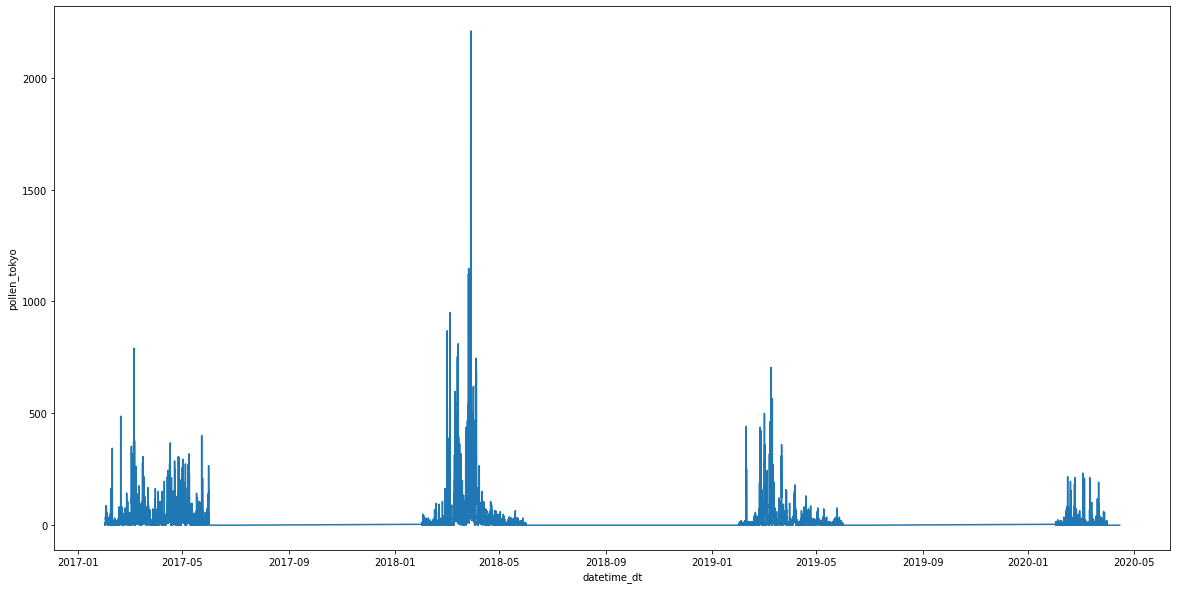

In [138]:
plt.figure(figsize = (20, 10))
ax = sns.lineplot(data= df, x="datetime_dt", y="pollen_tokyo")
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

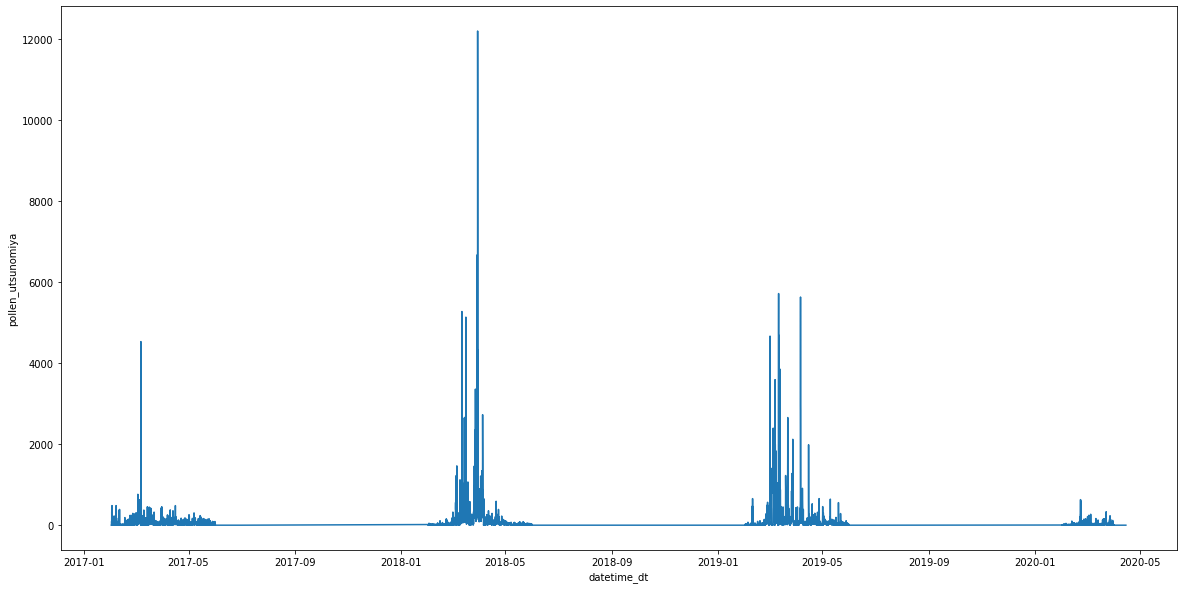

In [139]:
plt.figure(figsize = (20, 10))
ax = sns.lineplot(data= df, x="datetime_dt", y="pollen_utsunomiya")

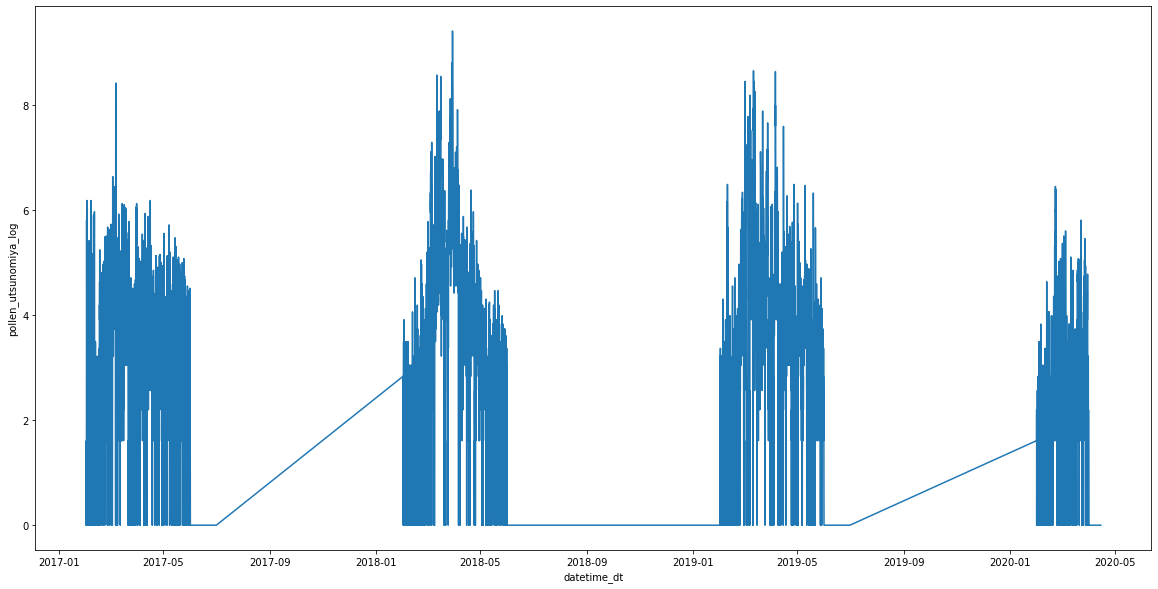

In [140]:
plt.figure(figsize = (20, 10))
_df = df.copy()
_df["pollen_utsunomiya_log"] =  np.log1p(df["pollen_utsunomiya"])
ax = sns.lineplot(data= _df, x="datetime_dt", y="pollen_utsunomiya_log")

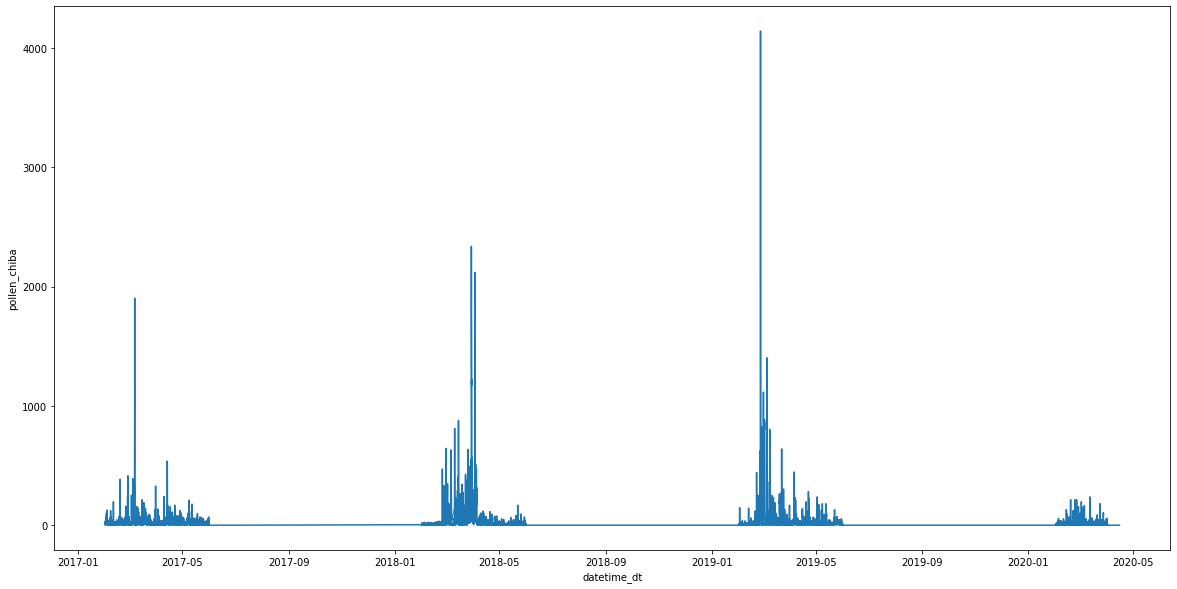

In [141]:
plt.figure(figsize = (20, 10))
ax = sns.lineplot(data= df, x="datetime_dt", y="pollen_chiba")

# 降水量

In [142]:
df = df.replace("欠測", 0)

In [143]:
df[["datetime_dt", "precipitation_tokyo"]]
df["precipitation_tokyo"] = df["precipitation_tokyo"].astype(float)

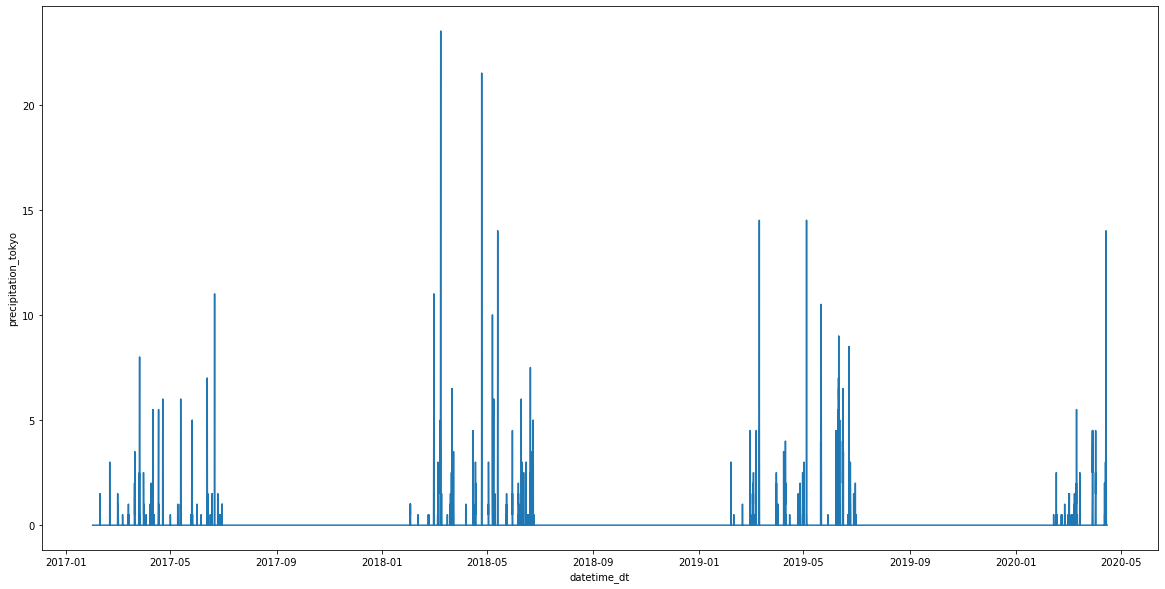

In [144]:
plt.figure(figsize = (20, 10))
ax = sns.lineplot(data= df.reset_index(drop=True), x="datetime_dt", y="precipitation_tokyo")

In [145]:
df[["datetime_dt", "precipitation_utsunomiya"]]

,datetime_dt,precipitation_utsunomiya
0,2017-02-01 01:00:00,0.0
1,2017-02-01 02:00:00,0.0
2,2017-02-01 03:00:00,0.0
3,2017-02-01 04:00:00,0.0
4,2017-02-01 05:00:00,0.0
...,...,...
12571,2020-04-14 20:00:00,0.0
12572,2020-04-14 21:00:00,0.0
12573,2020-04-14 22:00:00,0.0
12574,2020-04-14 23:00:00,0.0


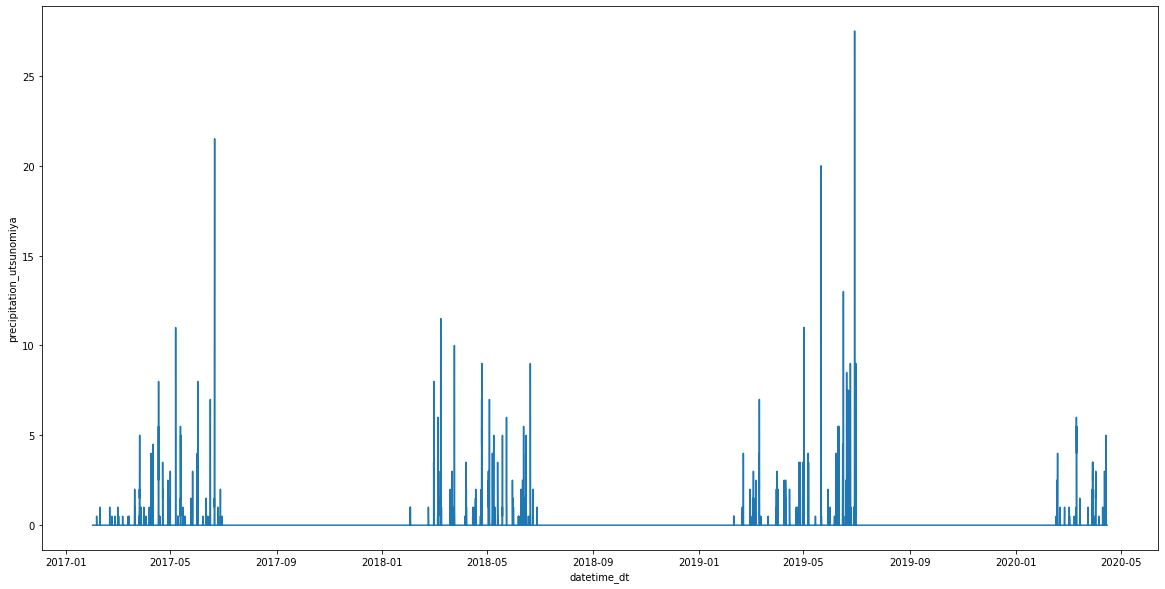

In [146]:
plt.figure(figsize = (20, 10))
ax = sns.lineplot(data= df, x="datetime_dt", y="precipitation_utsunomiya")

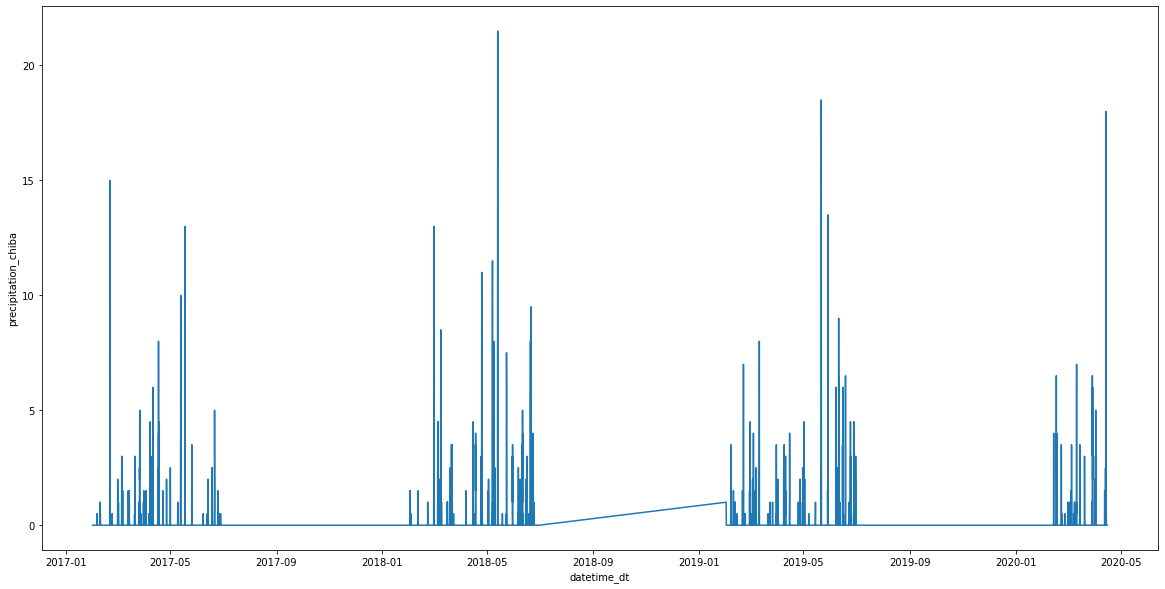

In [147]:
plt.figure(figsize = (20, 10))
ax = sns.lineplot(data= df, x="datetime_dt", y="precipitation_chiba")

# 温度

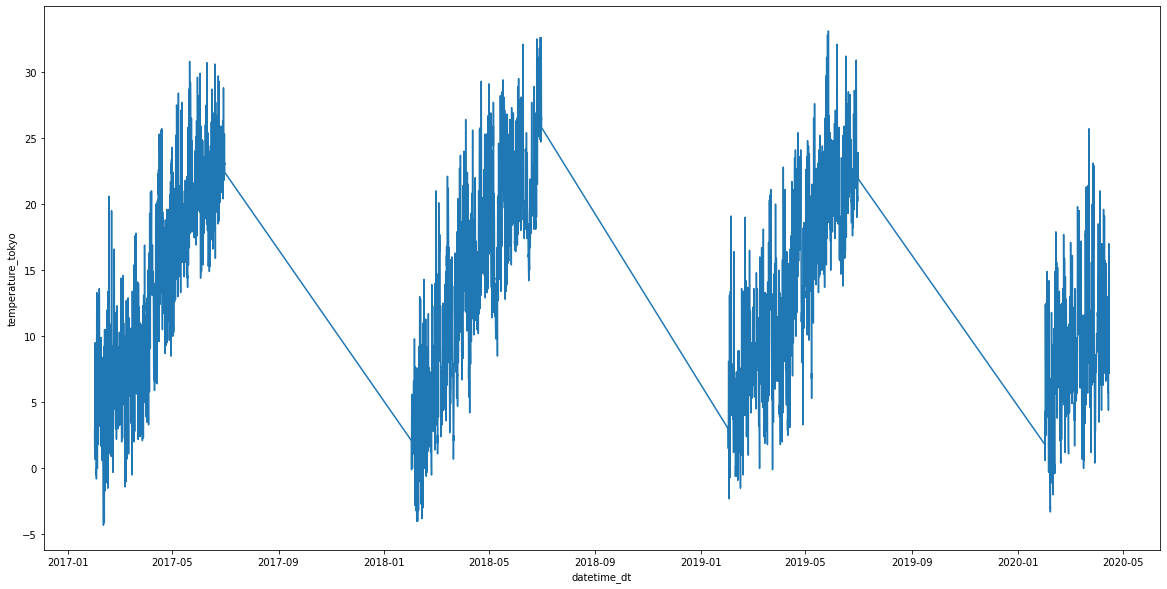

In [148]:
plt.figure(figsize = (20, 10))
ax = sns.lineplot(data= df, x="datetime_dt", y="temperature_tokyo")

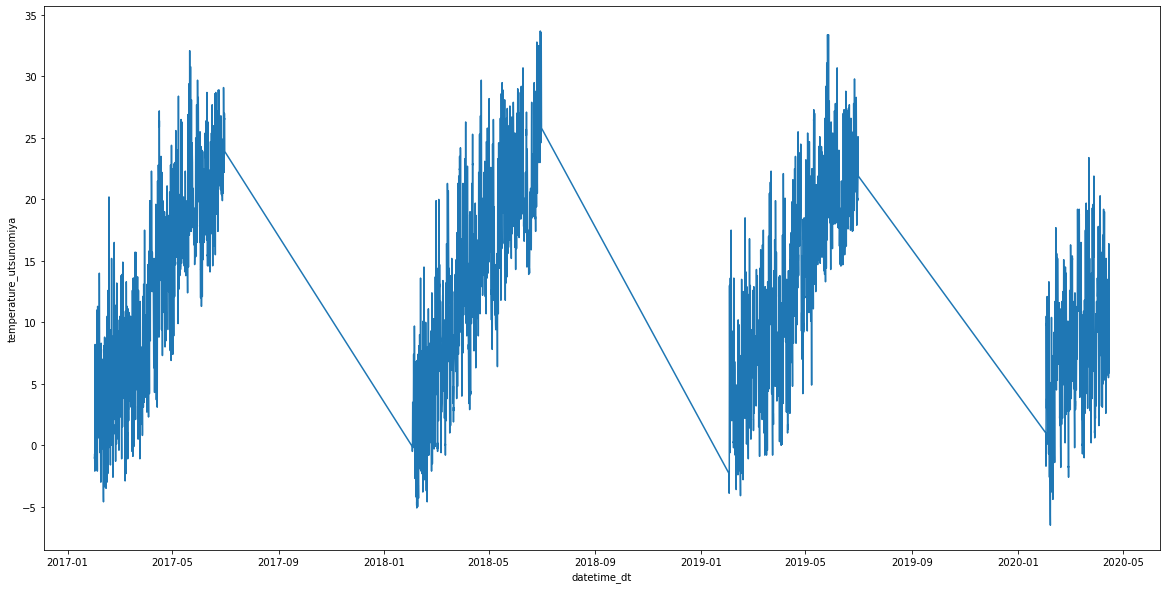

In [ ]:
plt.figure(figsize = (20, 10))
ax = sns.lineplot(data= df, x="datetime_dt", y="temperature_utsunomiya")

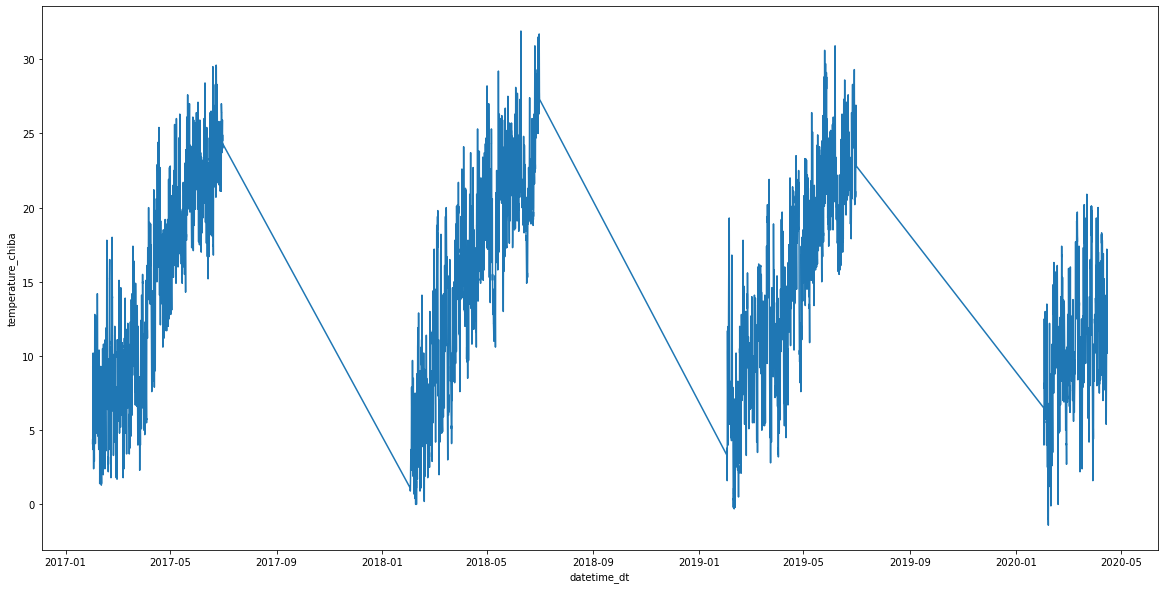

In [ ]:
plt.figure(figsize = (20, 10))
ax = sns.lineplot(data= df, x="datetime_dt", y="temperature_chiba")

# 風向

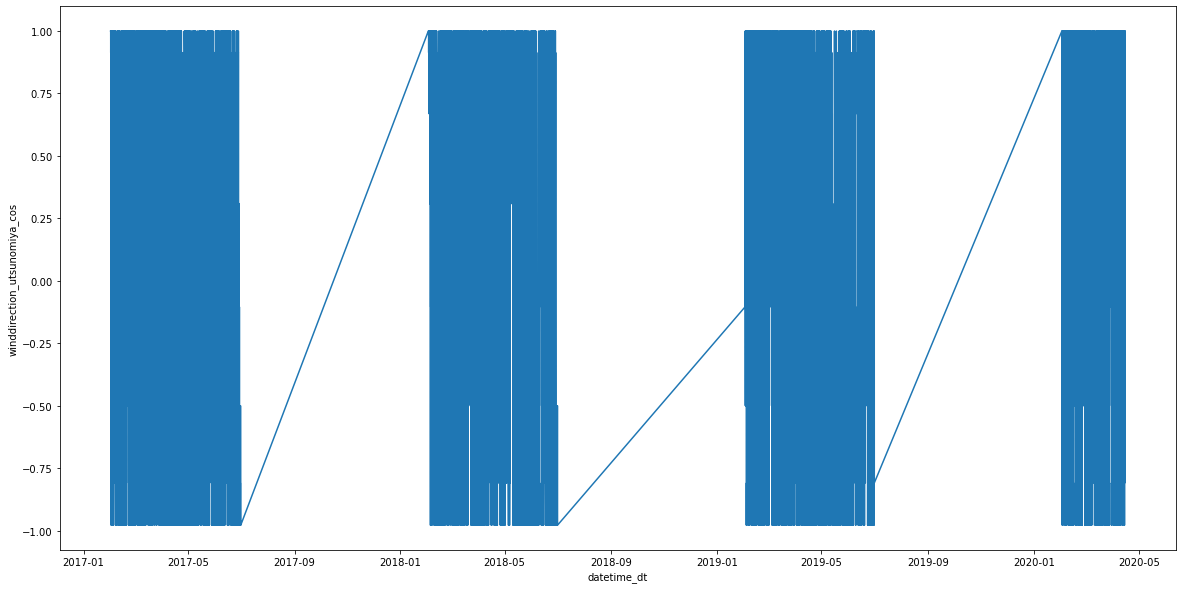

In [ ]:
plt.figure(figsize = (20, 10))
ax = sns.lineplot(data= df, x="datetime_dt", y="winddirection_utsunomiya_cos")

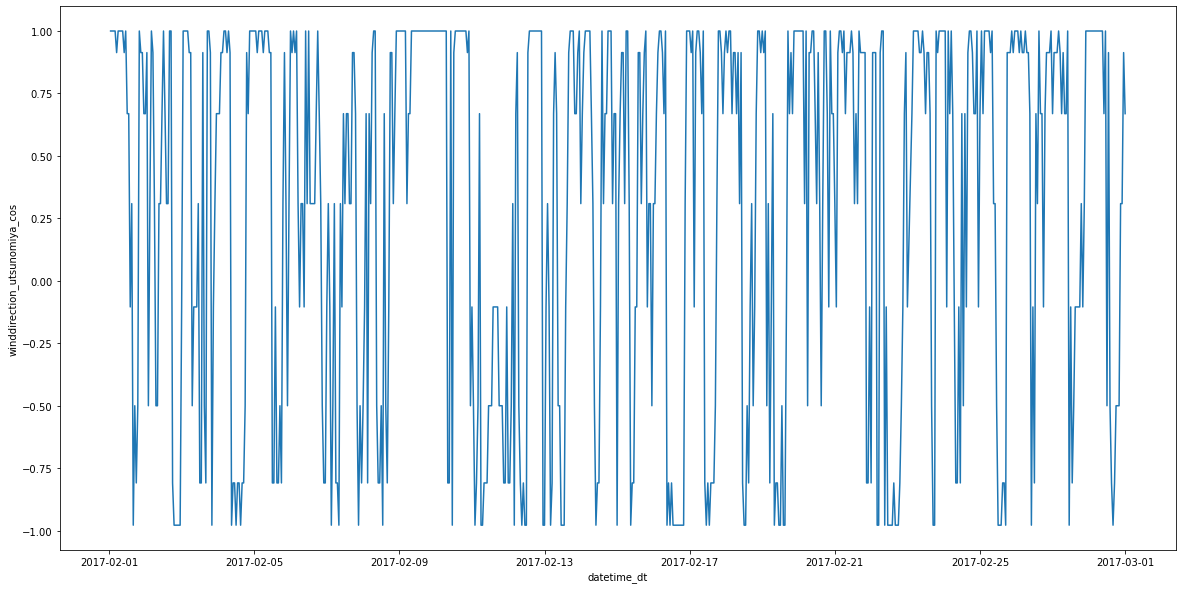

In [ ]:
plt.figure(figsize = (20, 10))
ax = sns.lineplot(data= df[df["datetime"].astype(str).str.startswith("201702")], 
                  x="datetime_dt", y="winddirection_utsunomiya_cos")

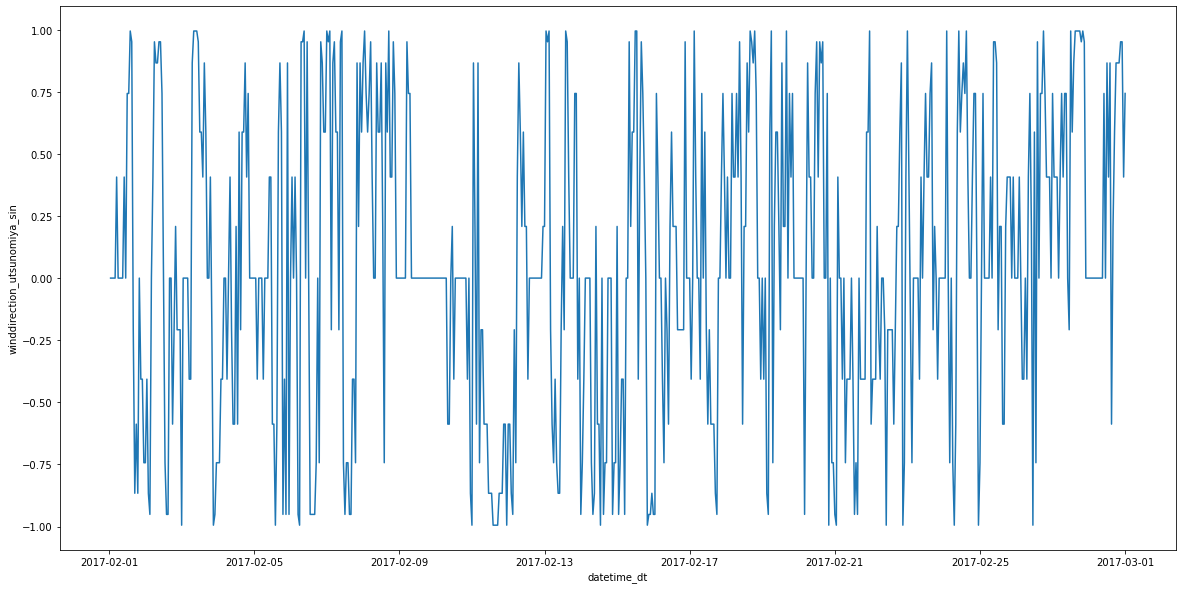

In [ ]:
plt.figure(figsize = (20, 10))
ax = sns.lineplot(data= df[df["datetime"].astype(str).str.startswith("201702")], 
                  x="datetime_dt", y="winddirection_utsunomiya_sin")

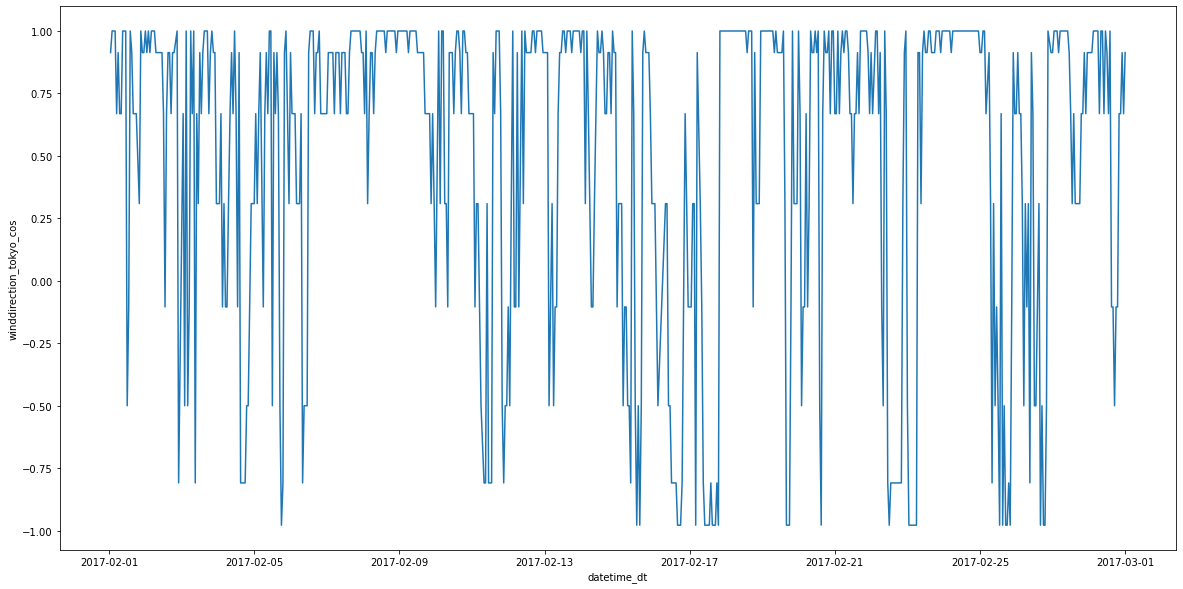

In [ ]:
plt.figure(figsize = (20, 10))
ax = sns.lineplot(data= df[df["datetime"].astype(str).str.startswith("201702")], 
                  x="datetime_dt", y="winddirection_tokyo_cos")

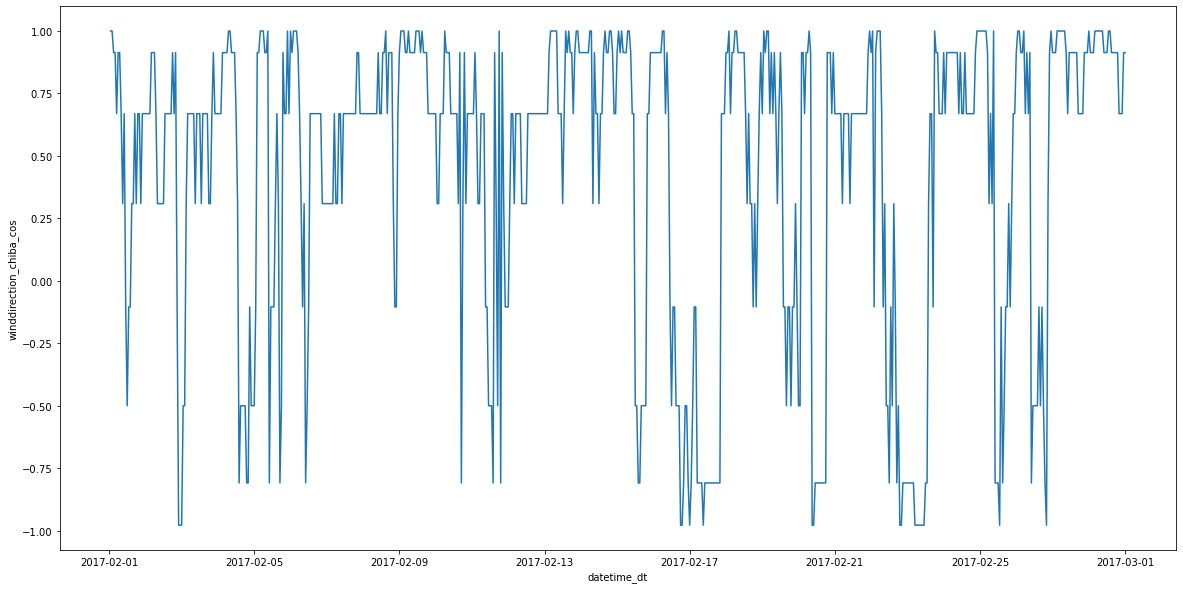

In [ ]:
plt.figure(figsize = (20, 10))
ax = sns.lineplot(data= df[df["datetime"].astype(str).str.startswith("201702")], 
                  x="datetime_dt", y="winddirection_chiba_cos")

In [ ]:
window_direct_map = {
    0: "静穏",
    1: "北北東",
    2:"北東",
    3:"東北東",
    4:"東",
    5:"東南東",
    6:"南東",
    7:"南南東",
    8:"南",
    9:"南南西",
    10:"南西",
    11:"西南西",
    12:"西",
    13:"西北西",
    14:"北西",
    15:"北北西",
    16:"北",
}

_df = df["winddirection_chiba"].value_counts().reset_index()
_df["index"] = _df["index"].map(window_direct_map)
_df.head()

,index,winddirection_chiba
0,南西,1266
1,北北東,1252
2,北北西,1238
3,西南西,1132
4,北東,1016


# 風速

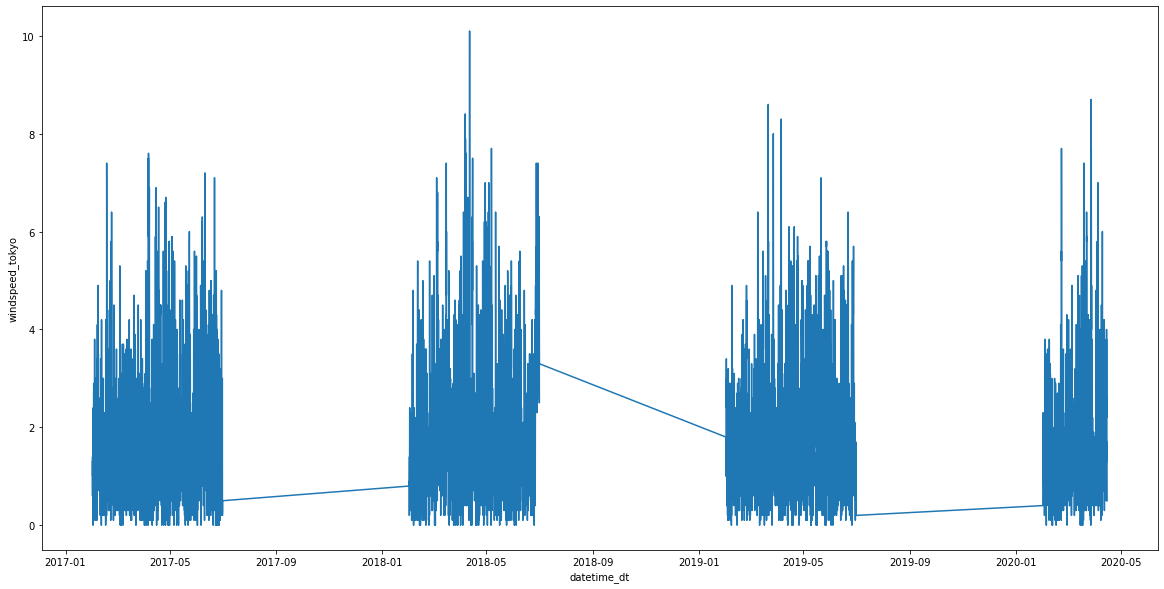

In [149]:
plt.figure(figsize = (20, 10))
ax = sns.lineplot(data= df, x="datetime_dt", y="windspeed_tokyo")

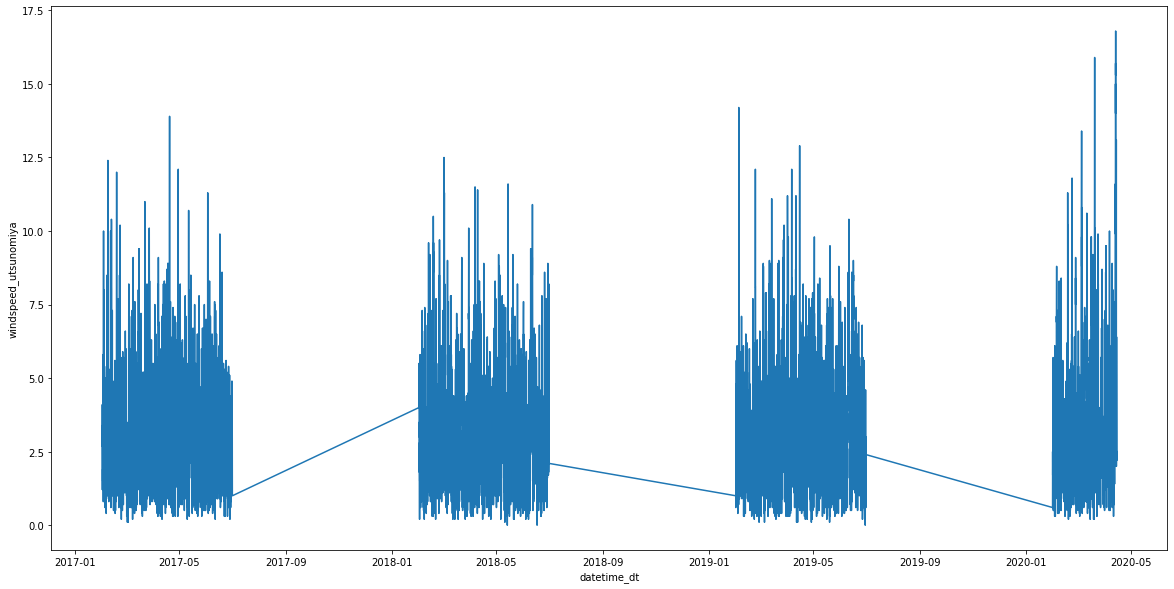

In [150]:
plt.figure(figsize = (20, 10))
ax = sns.lineplot(data= df, x="datetime_dt", y="windspeed_utsunomiya")

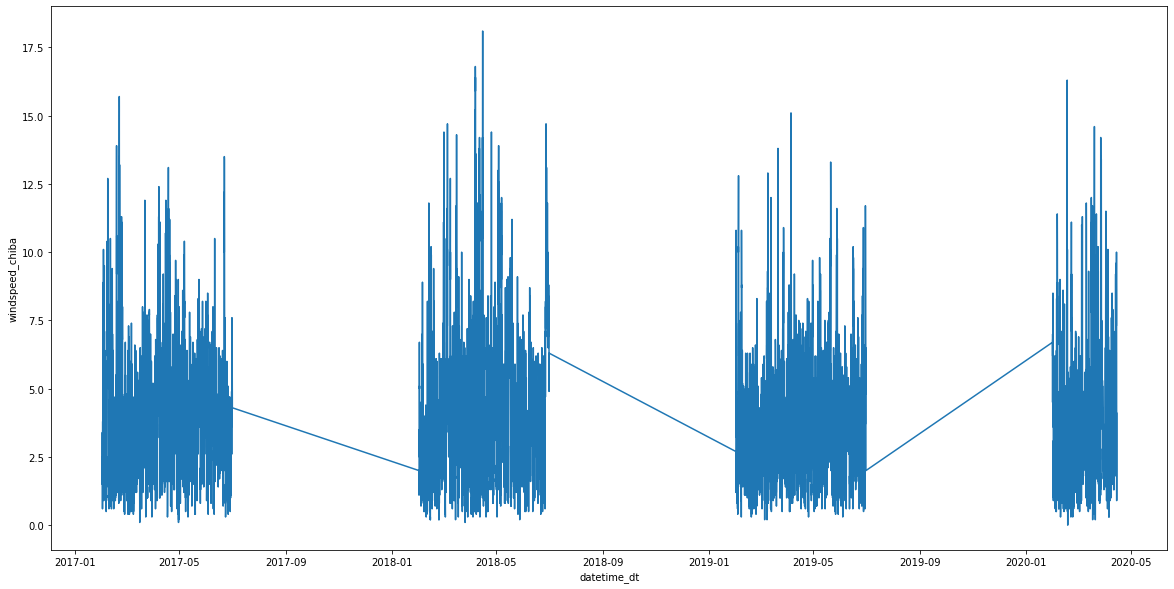

In [151]:
plt.figure(figsize = (20, 10))
ax = sns.lineplot(data= df, x="datetime_dt", y="windspeed_chiba")

In [152]:
df_train["pollen_utsunomiya"] 

0        0.0
1        0.0
2        4.0
3        0.0
4        0.0
        ... 
12235    8.0
12236    8.0
12237    0.0
12238    0.0
12239    0.0
Name: pollen_utsunomiya, Length: 12240, dtype: float64

In [153]:
df_train["pollen_chiba"] 

0         8.0
1        24.0
2        32.0
3        12.0
4        32.0
         ... 
12235     8.0
12236     4.0
12237     4.0
12238     0.0
12239     8.0
Name: pollen_chiba, Length: 12240, dtype: float64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


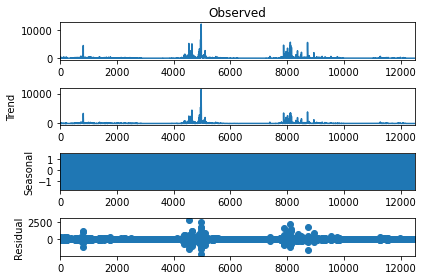

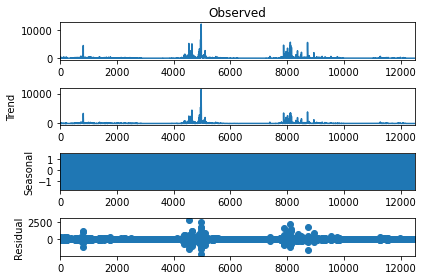

In [ ]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df["pollen_utsunomiya"].values, freq=3)
res.plot()

          trend                date
0           NaN 2017-02-01 01:00:00
1      1.333333 2017-02-01 02:00:00
2      1.333333 2017-02-01 03:00:00
3      1.333333 2017-02-01 04:00:00
4      1.333333 2017-02-01 05:00:00
...         ...                 ...
12499  0.000000 2020-04-14 20:00:00
12500  0.000000 2020-04-14 21:00:00
12501  0.000000 2020-04-14 22:00:00
12502  0.000000 2020-04-14 23:00:00
12503       NaN 2020-04-15 00:00:00

[12504 rows x 2 columns]


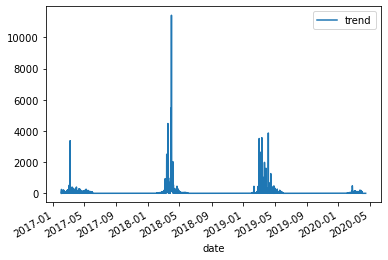

In [ ]:
trend = res.trend
trend = pd.DataFrame({'trend': trend, 'date':df["datetime_dt"]})
print(trend)
trend = trend.set_index(['date'])
trend = trend.plot()

In [ ]:
# ライブラリーの読み込み
import pandas as pd
import numpy as np
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
dftest = adfuller(df["pollen_utsunomiya"])
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical values :')
for k, v in dftest[4].items():
    print('\t', k, v)

ADF Statistic: -9.914909
p-value: 0.000000
Critical values :
	 1% -3.4308748473348
	 5% -2.8617719563481523
	 10% -2.5668934653671345


In [ ]:
from scipy.signal import savgol_filter

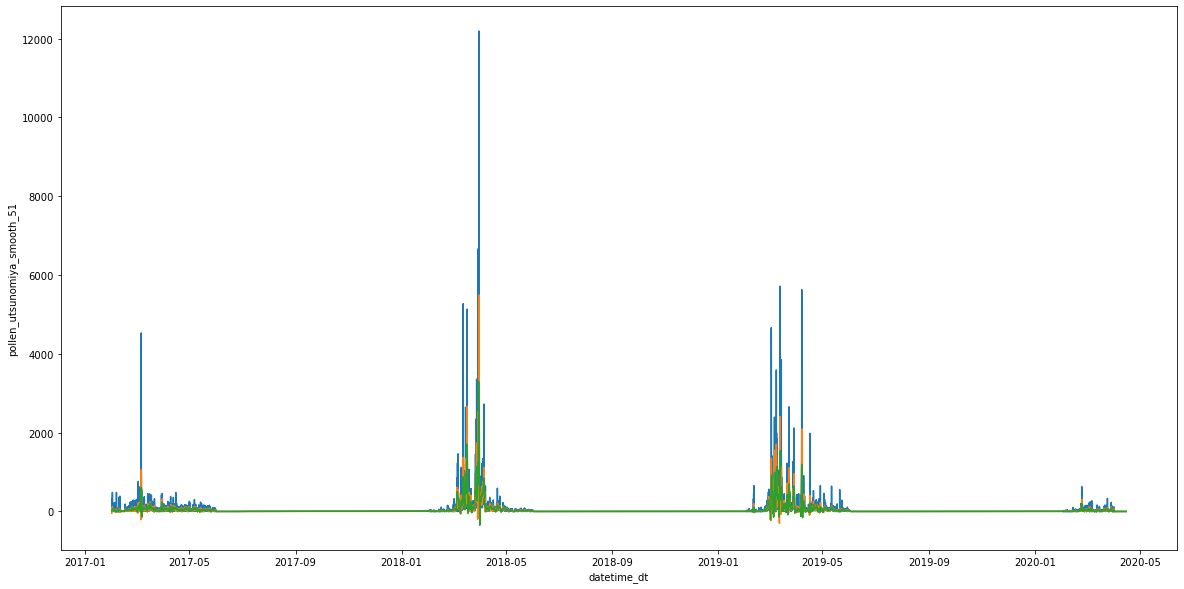

In [ ]:
plt.figure(figsize = (20, 10))
_df = df.copy()
_df["pollen_utsunomiya_smooth_25"] =  savgol_filter(df["pollen_utsunomiya"], window_length=25, polyorder=2)
_df["pollen_utsunomiya_smooth_51"] =  savgol_filter(df["pollen_utsunomiya"], window_length=51, polyorder=2)

ax = sns.lineplot(data= _df, x="datetime_dt", y="pollen_utsunomiya")
ax = sns.lineplot(data= _df, x="datetime_dt", y="pollen_utsunomiya_smooth_25")
ax = sns.lineplot(data= _df, x="datetime_dt", y="pollen_utsunomiya_smooth_51")